In [2]:
import pandas as pd
data = pd.read_csv('CleanedAirBnb.csv')

In [3]:
data.columns

Index([u'Unnamed: 0', u'id', u'date_account_created',
       u'timestamp_first_active', u'date_first_booking', u'gender', u'age',
       u'signup_method', u'signup_flow', u'language', u'affiliate_channel',
       u'affiliate_provider', u'first_affiliate_tracked', u'signup_app',
       u'first_device_type', u'first_browser', u'country_destination'],
      dtype='object')

In [4]:
del data['Unnamed: 0']

In [5]:
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [6]:
data["date_first_booking"] = pd.to_datetime(data["date_first_booking"], format='%Y-%m-%d', errors="coerce")
data['date_first_booking_year'] = data['date_first_booking'].dt.year
data['date_first_booking_month'] = data['date_first_booking'].dt.month

In [7]:
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_booking_year,date_first_booking_month
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010.0,8.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2012.0,9.0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010.0,2.0


# Yearly date_first_booking distribution

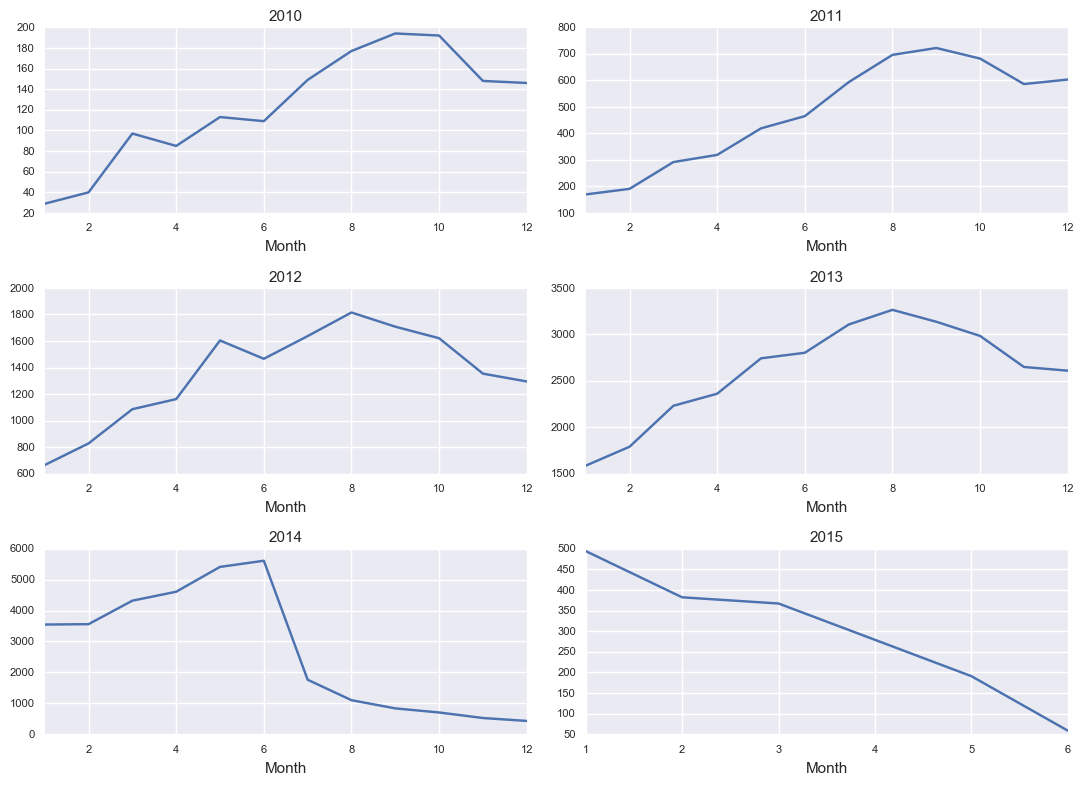

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(3, 2, 1)
data[data['date_first_booking_year']==2010].groupby(['date_first_booking_month']).size().plot(kind='line',fontsize=8,figsize=(11,8))
plt.xlabel('Month',fontsize=11)
plt.title('2010',fontsize=11)

plt.subplot(3, 2, 2)
data[data['date_first_booking_year']==2011].groupby(['date_first_booking_month']).size().plot(kind='line',fontsize=8,figsize=(11,8))
plt.xlabel('Month',fontsize=11)
plt.title('2011',fontsize=11)

plt.subplot(3, 2, 3)
data[data['date_first_booking_year']==2012].groupby(['date_first_booking_month']).size().plot(kind='line',fontsize=8,figsize=(11,8))
plt.xlabel('Month',fontsize=11)
plt.title('2012',fontsize=11)

plt.subplot(3, 2, 4)
data[data['date_first_booking_year']==2013].groupby(['date_first_booking_month']).size().plot(kind='line',fontsize=8,figsize=(11,8))
plt.xlabel('Month',fontsize=11)
plt.title('2013',fontsize=11)

plt.subplot(3, 2, 5)
data[data['date_first_booking_year']==2014].groupby(['date_first_booking_month']).size().plot(kind='line',fontsize=8,figsize=(11,8))
plt.xlabel('Month',fontsize=11)
plt.title('2014',fontsize=11)

plt.subplot(3, 2, 6)
data[data['date_first_booking_year']==2015].groupby(['date_first_booking_month']).size().plot(kind='line',fontsize=8,figsize=(11,8))
plt.xlabel('Month',fontsize=11)
plt.title('2015',fontsize=11)
plt.tight_layout()
plt.show()

# Distribution of country_destination


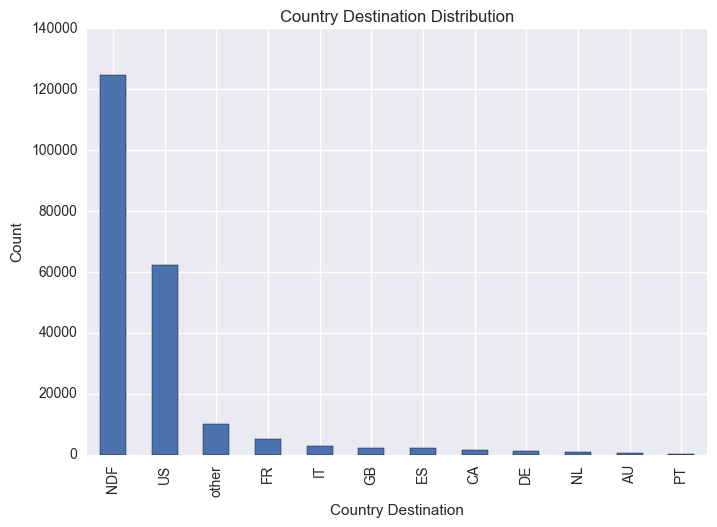

In [11]:
data.country_destination.value_counts().plot(kind='bar')

plt.xlabel('Country Destination')
plt.ylabel('Count')
plt.title('Country Destination Distribution')
plt.show()

#people make their first booking nationally more

# Destination By Gender

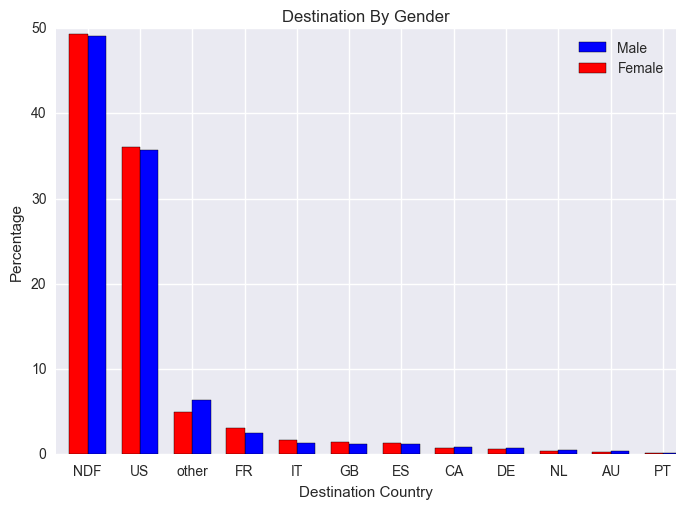

In [23]:
Female_destinations = data.loc[data['gender'] == 'FEMALE', 'country_destination'].value_counts() / sum(data['gender'] == 'FEMALE') * 100
Male_destinations = data.loc[data['gender'] == 'MALE', 'country_destination'].value_counts() / sum(data['gender'] == 'MALE') * 100

Male_destinations.plot(kind='bar', width=.35, color='b', position=0, label='Male', rot=0)
Female_destinations.plot(kind='bar', width=.35, color='r', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Destination By Gender')

sns.despine()
plt.show()

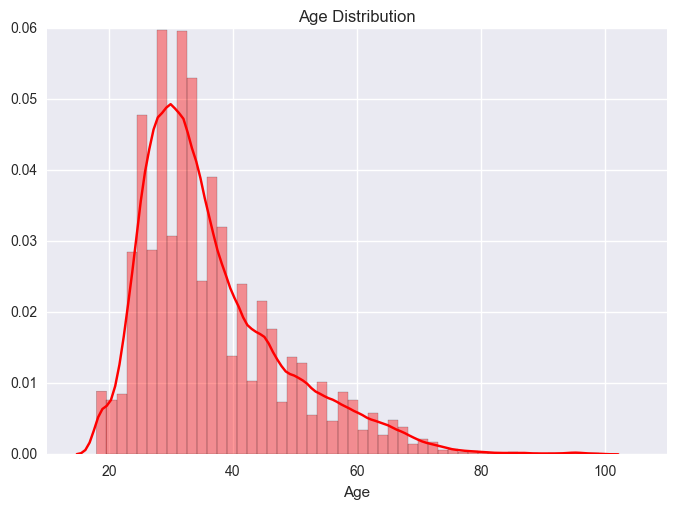

In [18]:
sns.distplot(data.age.dropna(), color='r')
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()


# Signup Method

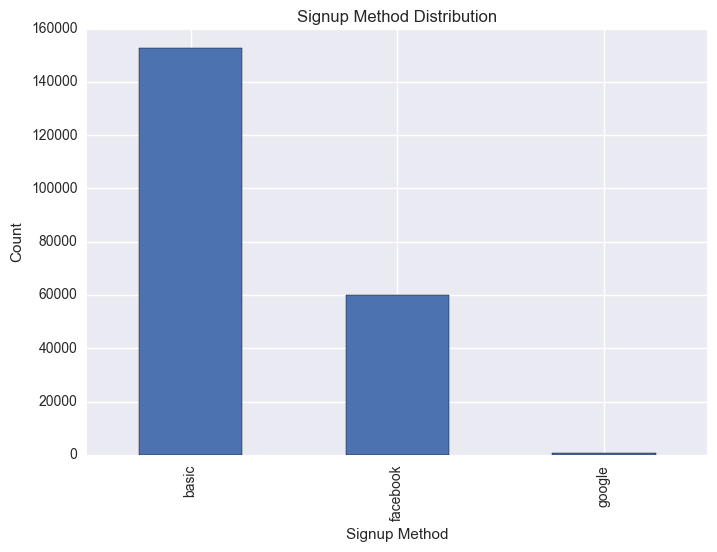

In [22]:
data.signup_method.value_counts().plot(kind='bar')

plt.xlabel('Signup Method')
plt.ylabel('Count')
plt.title('Signup Method Distribution')
plt.show()

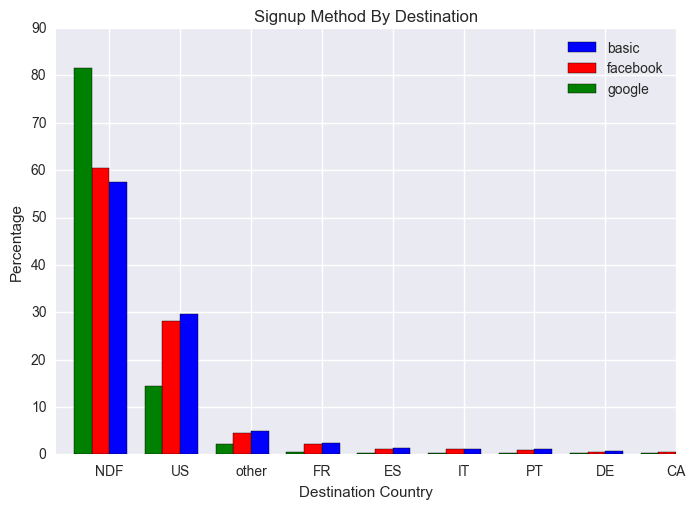

In [27]:
basic = data.loc[data['signup_method'] == 'basic', 'country_destination'].value_counts() / sum(data['signup_method'] == 'basic') * 100
facebook = data.loc[data['signup_method'] == 'facebook', 'country_destination'].value_counts() / sum(data['signup_method'] == 'facebook') * 100
google = data.loc[data['signup_method'] == 'google', 'country_destination'].value_counts() / sum(data['signup_method'] == 'google') * 100


basic.plot(kind='bar', width=.25, color='b', position=0, label='basic', rot=0)
facebook.plot(kind='bar', width=.25, color='r', position=1, label='facebook', rot=0)
google.plot(kind='bar', width=.25, color='g', position=2, label='google', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Signup Method By Destination')

sns.despine()
plt.show()

#This explains the 

# Signup Flow

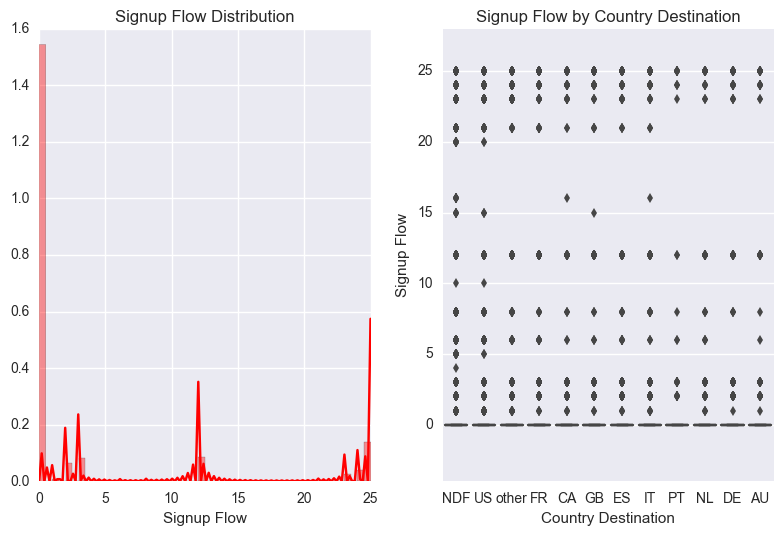

In [77]:
plt.subplot(1,2,1)
sns.distplot(data.signup_flow, color='r')
plt.xlabel('Signup Flow')
plt.title('Signup Flow Distribution')

plt.subplot(1,2,2)
import numpy as np
sns.boxplot(data.signup_flow, groupby=data.country_destination)
plt.ylim(-4,28)
plt.xlabel('Country Destination')
plt.ylabel('Signup Flow')
plt.title('Signup Flow by Country Destination')
plt.tight_layout()

plt.show()

# Language

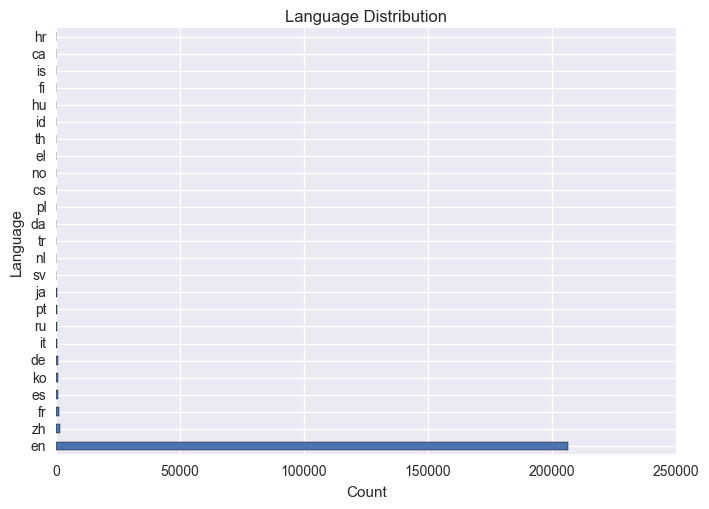

In [89]:
data.language.value_counts().plot(kind='barh')

plt.ylabel('Language')
plt.xlabel('Count')
plt.title('Language Distribution')
plt.show()

#This is an indicator for the majority of people are English speakers. We can set En = 1 and Non-En = 0

# affiliate channel & provider & first_affiliate_tracked

In [88]:
set(data['affiliate_channel'])

{'api',
 'content',
 'direct',
 'other',
 'remarketing',
 'sem-brand',
 'sem-non-brand',
 'seo'}

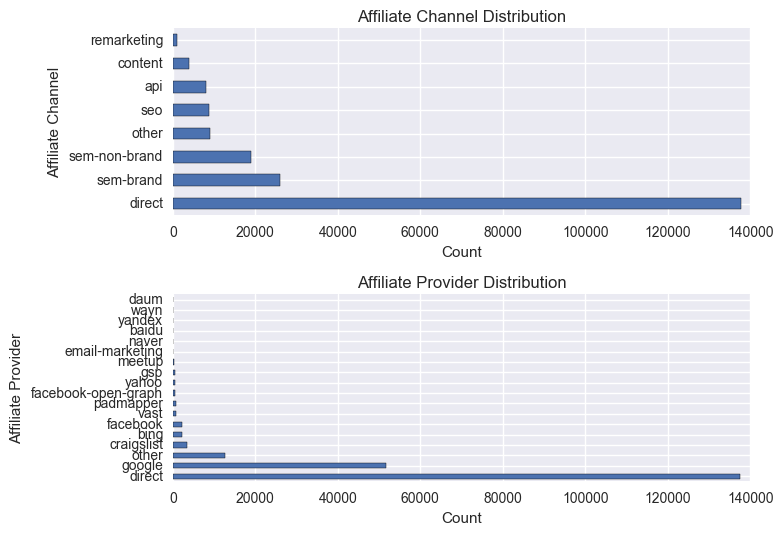

In [100]:
plt.subplot(2,1,1)

data.affiliate_channel.value_counts().plot(kind='barh')

plt.ylabel('Affiliate Channel')
plt.xlabel('Count')
plt.title('Affiliate Channel Distribution')

plt.subplot(2,1,2)

data.affiliate_provider.value_counts().plot(kind='barh')

plt.ylabel('Affiliate Provider')
plt.xlabel('Count')
plt.title('Affiliate Provider Distribution')


plt.tight_layout()

plt.show()

#set direct = 1, non-direct = 0

# first_affiliate_tracked

In [96]:
set(data.first_affiliate_tracked)

{nan,
 'linked',
 'local ops',
 'marketing',
 'omg',
 'product',
 'tracked-other',
 'untracked'}

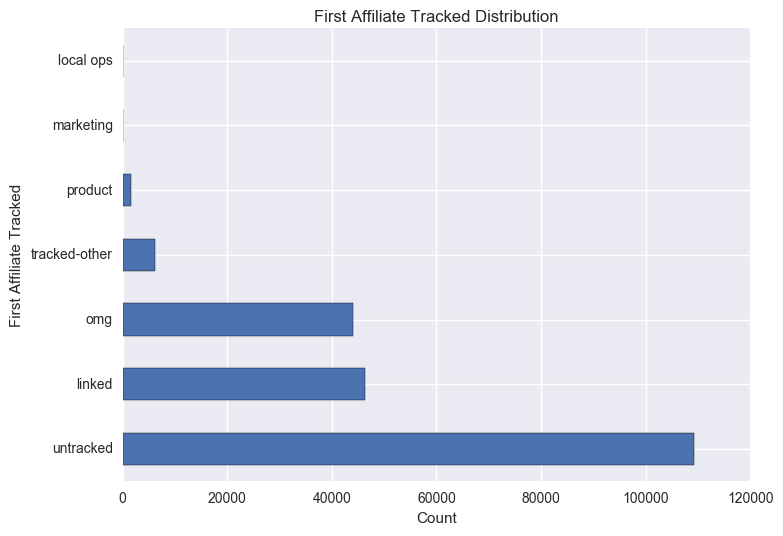

In [97]:
data.first_affiliate_tracked.value_counts().plot(kind='barh')

plt.ylabel('First Affiliate Tracked')
plt.xlabel('Count')
plt.title('First Affiliate Tracked Distribution')
plt.tight_layout()

plt.show()

# Signup App

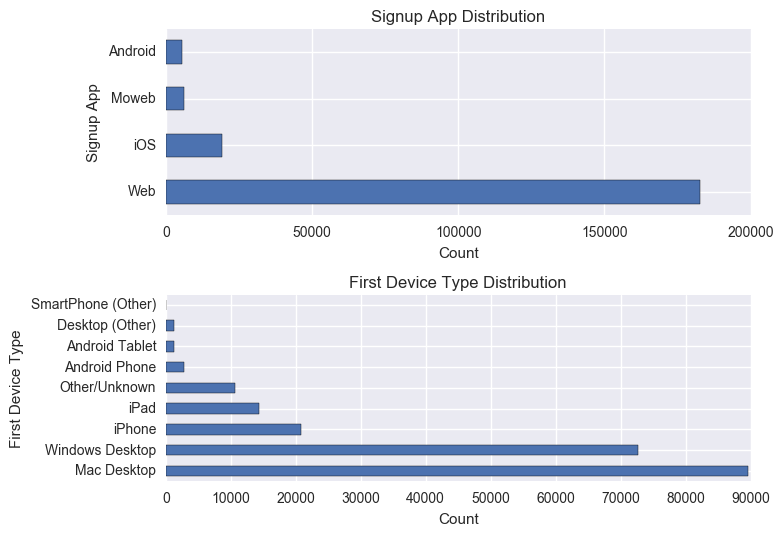

In [105]:
plt.subplot(2,1,1)
data.signup_app.value_counts().plot(kind='barh')

plt.ylabel('Signup App')
plt.xlabel('Count')
plt.title('Signup App Distribution')

plt.subplot(2,1,2)
data.first_device_type.value_counts().plot(kind='barh')

plt.ylabel('First Device Type')
plt.xlabel('Count')
plt.title('First Device Type Distribution')


plt.tight_layout()

plt.show()

#Dummify Web=1,non-web=0

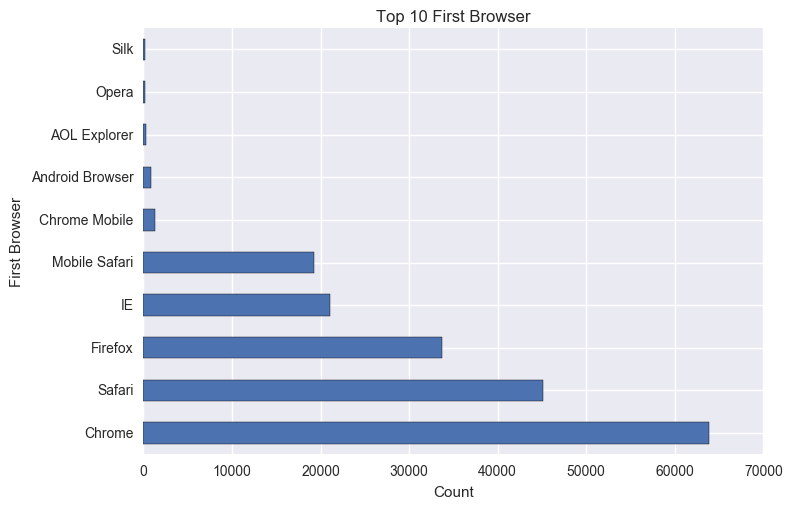

In [108]:
a= data.first_browser.value_counts()
a[0:10].plot(kind='barh')

plt.ylabel('First Browser')
plt.xlabel('Count')
plt.title('Top 10 First Browser')




plt.show()



In [ ]:
#Q: Where will be the 1st booking country for foreigners?

In [109]:
data.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_booking_year,date_first_booking_month
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
